# **Blood Cell image classification using CNN**
Shaunak Prabhu  001056494

In this notebook we will be looking at how to classify blood cell images into 4 groups: eosinophil, lymphocyte, neutrophil, and monocyte using CNN and keras 

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math,cv2,os


In [28]:
!mkdir data  #required in google collab

mkdir: cannot create directory ‘data’: File exists


In [29]:
!unzip data.zip -d data/  #to unzip the data package into a folder

Archive:  data.zip
replace data/data/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/_0_1616.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
test_data_dir = '/content/data/data/dataset-master/dataset-master/JPEGImages'
train_data_dir = '/content/data/data/dataset2-master/dataset2-master/images/TRAIN'
valid_data_dir = '/content/data/data/dataset2-master/dataset2-master/images/TEST'

In [0]:
img_height = 150
img_width = 150
data_list = os.listdir(train_data_dir)
num_classes = len(data_list)
batch_size = 32
categories = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']


Here we are setting the image size to 150 x 150 to make processing easier and faster by reducing the feature size

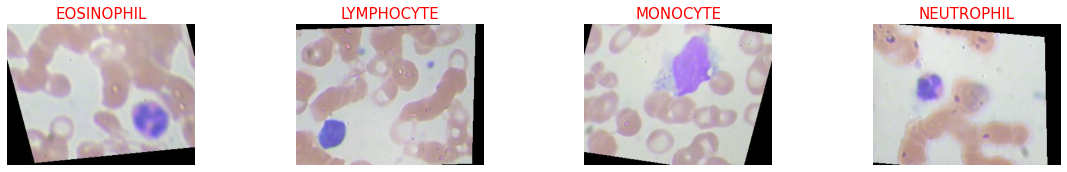

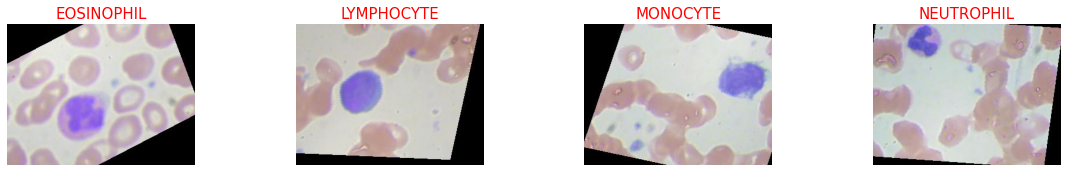

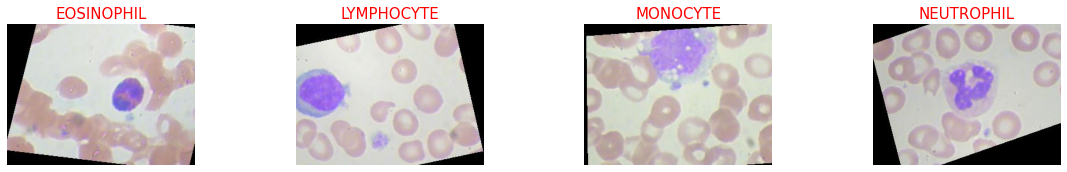

In [6]:
for k in range(3):
    i=0
    plt.figure(figsize=(25,15))
    for category in categories:
        plt.subplot(5, 5, i+1)
        plt.yticks([])
        plt.xticks([])
        path=train_data_dir + '/' + category
        image_p=os.listdir(path)
        plt.title(category , color='red').set_size(15)
        plt.axis('off')
        image = cv2.imread(os.path.join(path, image_p[k])) 
        image = image[:, :, [2, 1, 0]] 
        plt.imshow(image)
        i+=1

In [0]:
datagen = ImageDataGenerator(rescale=1./255)


In [8]:
train_generator = datagen.flow_from_directory(directory=train_data_dir, target_size=(img_width,img_height), color_mode='rgb',
                                              classes = ['EOSINOPHIL', 'LYMPHOCYTE','MONOCYTE','NEUTROPHIL'],
                                              class_mode='categorical', batch_size=batch_size, shuffle = True)



Found 9957 images belonging to 4 classes.


In [9]:
validation_generator =  datagen.flow_from_directory(directory=valid_data_dir, target_size=(img_width,img_height), color_mode='rgb',
                                              classes = ['EOSINOPHIL', 'LYMPHOCYTE','MONOCYTE','NEUTROPHIL'],
                                              class_mode='categorical', batch_size=batch_size, shuffle = True)

Found 2487 images belonging to 4 classes.


In [0]:
train_num = train_generator.samples
validation_num = validation_generator.samples

In [11]:
train_generator.image_shape

(150, 150, 3)

 **Creating CNN model**

 Here we will be creating a CNN model that has 
an input layer, 2 hidden layers, and an output layer. 
I have used convolution and max pooling in the input and hidden layers as well as batch normalization and dropout for regularization.

The output layer has a flatten layer and 3 dense layers.

In [0]:
def mod(activ, end, opt,lo,ep,k_int):
    model = Sequential()

    model.add(Conv2D(32,(3,3),input_shape = (150,150,3),activation=activ, kernel_initializer = k_int))
    model.add(BatchNormalization( momentum=0.85))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(32,(3,3),activation = activ))
    model.add(BatchNormalization( momentum=0.85))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),activation=activ))
    model.add(BatchNormalization( momentum=0.85))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512,activation= activ, kernel_initializer=k_int))
    model.add(Dense(128, activation= activ))
    model.add(Dropout(0.2))
    model.add(Dense(4,activation =end))
  

  #This function is used to compile the model and selct an apporopriate gradient estimator and a cost function
    model.compile(optimizer=opt, loss=lo, metrics=['accuracy'])
    model.summary()

#The model is trained and the number of epochs is selected
    his = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size, epochs= ep,
                            verbose = 1, validation_data = validation_generator, validation_steps = validation_num // batch_size )
 
 # plotting the train vs test acccuracy with respect to the number of epochs
    acc = his.history['accuracy']
    val_acc = his.history['val_accuracy']
    loss = his.history['loss']
    val_loss = his.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, 'red', label='Training acc')
    plt.plot(epochs, val_acc, 'blue', label='Validation acc')
    plt.legend()

    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'red', label='Training loss')
    plt.plot(epochs, val_loss, 'blue', label='Validation loss')

    plt.legend()

    plt.show()

**CNN model 2 architecture**


In [0]:
def mod2(activ, end, opt,lo,ep,k_int):
    model = Sequential()

    model.add(Conv2D(32,(3,3),input_shape = (150,150,3),activation=activ, kernel_initializer=k_int))
    model.add(BatchNormalization( momentum=0.85))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(32,(3,3),activation = activ))
    model.add(BatchNormalization( momentum=0.85))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512,activation= activ,kernel_initializer=k_int))
    model.add(Dense(128, activation= activ))
    model.add(Dropout(0.2))
    model.add(Dense(4,activation =end))

  #model compiling
    model.compile(optimizer=opt, loss=lo, metrics=['accuracy'])
    model.summary()

#model fitting
    his = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size, epochs= ep,
                        verbose = 1, validation_data = validation_generator, validation_steps = validation_num // batch_size )
  
 #train vs test data plotting
    acc = his.history['accuracy']
    val_acc = his.history['val_accuracy']
    loss = his.history['loss']
    val_loss = his.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, 'red', label='Training acc')
    plt.plot(epochs, val_acc, 'blue', label='Validation acc')
    plt.legend()

    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'red', label='Training loss')
    plt.plot(epochs, val_loss, 'blue', label='Validation loss')

    plt.legend()

    plt.show()

**Model 1**

Here we will be taking a standard activation function of Relu and softmax at the output layer

We will also be using Adam as the optimizer and categorical cross entropy as the cost function

we will first start of with 5 epochs

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

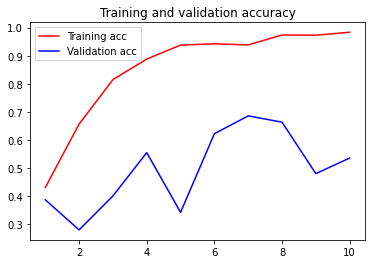

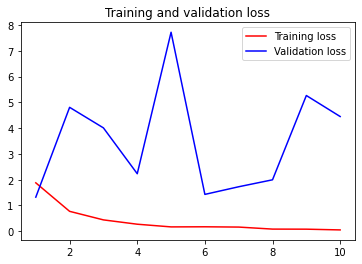

In [16]:
 model1 = mod('relu','softmax','adam','categorical_crossentropy',10,'random_uniform')


We can see this model does not perform great and must be overfitting the data towards the end as the accuracy is not increasing in the validation set with increase in epochs 

**Model 2**


Here I will be taking a diffeent initilizer to check if it causes a change in our output. glorot normal works by drawing samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

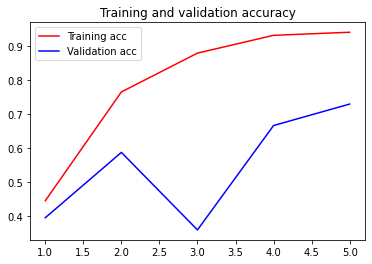

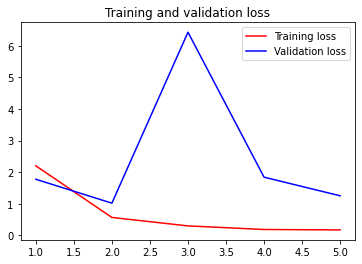

In [17]:
 model2 = mod('relu','softmax','adam','categorical_crossentropy',5,'glorot_normal')

This model performs better than the previous one as the validation accuracy is imporoved and so is the training accuracy iver less epochs. Hence we can say that the initilizer did better.

**Model 3**

Here we will be taking a different activation fucntion to test how the model behaves when it changes.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)       

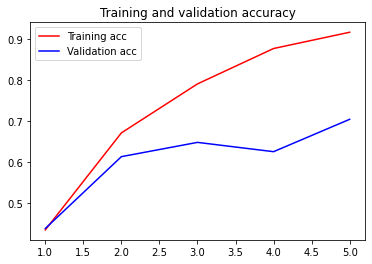

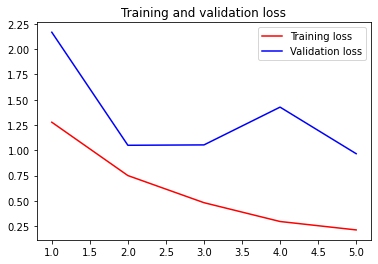

In [18]:
 model3 = mod('tanh','softmax','adam','categorical_crossentropy',5,'glorot_normal')

This model seems to be a lot more consistent. While the overall accuracy is slightly less the results are more consistent and there is a smaller difference between the accuracy of the training and the validation set.

**Model 4**

Here we will be using another network architecture to check to see if by reducing the layers does the model have the same accuracy or in this case does the better model have more layers. 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 41472)            

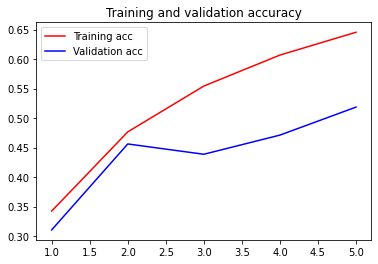

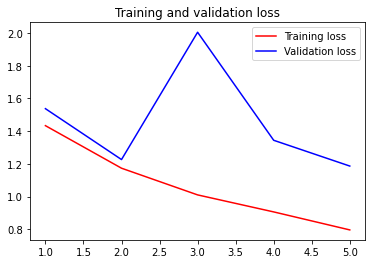

In [20]:
 model4 = mod2('tanh','softmax','adam','categorical_crossentropy',5, 'glorot_normal')

**Model 5**

To test which gradient estimator is better we will be using Adagrad which is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the learning rate.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)       

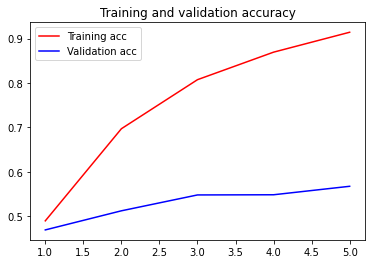

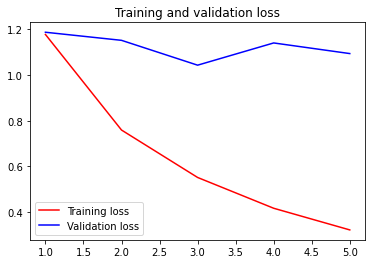

In [22]:
 model5 = mod('tanh','softmax','Adagrad','categorical_crossentropy',5,'glorot_normal')

This model doesnt seem to perform well on the validation set therefore we can say that adam was a better gradient estimator than adagrad here.

**Model 6**

To find the effect of cost function we will be using categorical hinge here.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 64)       

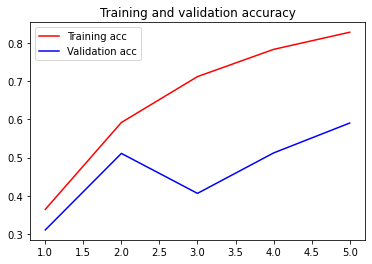

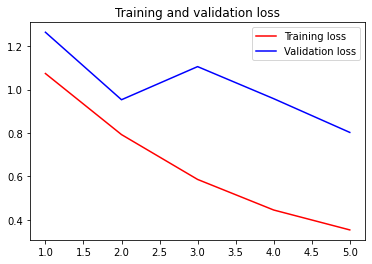

In [23]:
 model5 = mod('tanh','softmax','adam','categorical_hinge',5,'glorot_normal')

While the model did learn better with respect to epochs, the overall learning was relatively slower and therefore fetched lower accuracy.

**Conclusion**

Model 2 seems to be the best performing model with the specified hyperparameters as it fetched the best results with respect to accuracy on the validation set.

**References**


1.   https://www.kaggle.com/drobchak1988/blood-cell-images-acc-92-val-acc-90
2.   https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5



Copyright 2020 Shaunak Prabhu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.